#### Annotation Tool Script ####
* Annotation Script for Images Object Classification 

In [14]:
import numpy as np
import cv2
import glob
import sys
import os

In [15]:
import tkinter as tk
import tkinter.simpledialog

In [16]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [17]:
data_folder_path = 'images_data/'
images = glob.glob(data_folder_path + '*.png')

In [23]:
main = tk.Tk()
main.withdraw()

bboxes = []

for i, img_path in enumerate(images):
    
    img_name = img_path.split('\\')[-1].split(',')[0]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (360,300))
    
    copy = img.copy()
    cv2.putText(copy, 'Is this image valid? Y/N/D(delete)', (20, img.shape[0]-20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 150, 0), 2)
    cv2.imshow("Select Object", copy) 
    cv2.waitKey(1)
    
    key = cv2.waitKey(0) or 0xff
    
    if key == ord('y'):
        
        bboxes.append([img_name])
        
        cv2.putText(img, 'Define Object Bounding Box', (20, img.shape[0]-20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 150, 0), 2)
        
        n_objects = int(tkinter.simpledialog.askstring('Objs', 'Define Number of Objects you want to classify in this image: '))
        
        for j in range(n_objects):
            
            roi = cv2.selectROI("Select Object", img)
            p_start = (roi[0], roi[1])
            p_end = (roi[0]+roi[2], roi[1]+roi[3])

            class_name = tkinter.simpledialog.askstring('Define Class', 'Define Class: ')

            bboxes[i].append([p_start, p_end, class_name])

    if key == ord('n'):
        continue
        
    if key == ord('d'):
        os.remove(img_path)
        print(img_name  + " deleted!")
    
cv2.destroyAllWindows()

for i in bboxes:
    print(i)

['img1.png', [(193, 28), (219, 58), 'crow eye'], [(107, 9), (193, 80), 'crow beak']]
['img2.png', [(88, 95), (170, 184), 'blue'], [(226, 153), (269, 196), 'red'], [(186, 62), (226, 100), 'yellow']]
['img3.png', [(226, 13), (289, 131), 'crow'], [(162, 227), (296, 285), 'wood']]
['img4.png', [(48, 10), (288, 250), 'crow']]


['img1.png', [(193, 28), (219, 58), 'crow eye'], [(107, 9), (193, 80), 'crow beak']]
['img2.png', [(88, 95), (170, 184), 'blue'], [(226, 153), (269, 196), 'red'], [(186, 62), (226, 100), 'yellow']]
['img3.png', [(226, 13), (289, 131), 'crow'], [(162, 227), (296, 285), 'wood']]
['img4.png', [(48, 10), (288, 250), 'crow']]


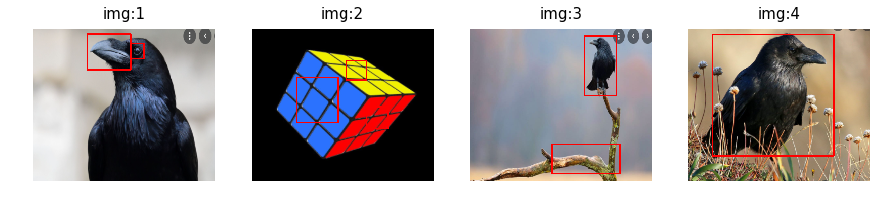

In [33]:
imgs = []
titles = []

for i, bbox in enumerate(bboxes):
    image = cv2.imread(data_folder_path + bboxes[i][0])
    image = cv2.resize(image, (360,300))
    
    bbox = bboxes[i]
    for j in range(1,len(bbox)):
        cv2.rectangle(image, bbox[j][0], bbox[j][1], (0,0,255), 2)
        
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgs.append(image)
    titles.append('img:{}'.format(i+1))
    print(bbox)
    
OpCV_Utils.show_multiple_images_plt([imgs], [titles], fig_size=(15,10))